In [1]:
#importing the necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#reading and storing the dataset
cancer_dataset=pd.read_csv("C:/Users/chalamalla eshwar/Desktop/ml projects/BRCA.csv")

# preprocessing

In [3]:
#overview
cancer_dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
cancer_dataset.shape

(341, 16)

In [6]:
cancer_dataset.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [7]:
#replacing the age null values using the mean age value
age=cancer_dataset['Age'].mean()

58.88622754491018

In [10]:
#finding out the number of null values in each attribute
cancer_dataset.isnull().sum()

Patient_ID             7
Age                    0
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [12]:
#data information
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 341 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [16]:
cancer_dataset.loc[cancer_dataset.isnull().any(axis=1)]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.000000,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.000000,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.000000,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.000000,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.000000,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.000000,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.000000,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.000000,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.000000,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.000000,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [17]:
#removing the null values tuples from 334 to 340
cancer_dataset=cancer_dataset.loc[:333]

In [18]:
cancer_dataset

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [19]:
cancer_dataset.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [20]:
cancer_dataset.dropna(inplace = True)

In [21]:
cancer_dataset.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [22]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [23]:
cancer_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool

In [24]:
#no need of date_of_surgery and date_of_last_visit
cancer_dataset.drop(columns = [ "Date_of_Surgery","Date_of_Last_Visit"], inplace = True)

In [25]:
cancer_dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [26]:
cancer_dataset.shape

(317, 14)

In [27]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      317 non-null    object 
 1   Age             317 non-null    float64
 2   Gender          317 non-null    object 
 3   Protein1        317 non-null    float64
 4   Protein2        317 non-null    float64
 5   Protein3        317 non-null    float64
 6   Protein4        317 non-null    float64
 7   Tumour_Stage    317 non-null    object 
 8   Histology       317 non-null    object 
 9   ER status       317 non-null    object 
 10  PR status       317 non-null    object 
 11  HER2 status     317 non-null    object 
 12  Surgery_type    317 non-null    object 
 13  Patient_Status  317 non-null    object 
dtypes: float64(5), object(9)
memory usage: 37.1+ KB


In [28]:
cancer_dataset.dtypes

Patient_ID         object
Age               float64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

# data analysis and visualization

In [46]:
#correlation of the data
cancer_dataset.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


In [29]:
cancer_dataset.describe()
#only numerical values gives the discription

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [30]:
cancer_dataset.Gender.describe()

count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

In [31]:
cancer_dataset["Tumour_Stage"].describe()

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

In [32]:
cancer_dataset["Tumour_Stage"].value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

In [125]:
cancer_dataset["PR status"].value_counts()

1    317
Name: PR status, dtype: int64

<AxesSubplot:title={'center':'Tumour of Patients'}, ylabel='Tumour_Stage'>

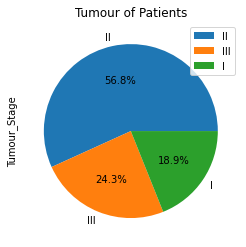

In [37]:
cancer_dataset['Tumour_Stage'].value_counts().plot(kind='pie',title='Tumour of Patients', legend=True, autopct='%1.1f%%')

In [38]:
cancer_dataset["Histology"].describe()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

In [39]:
cancer_dataset['Histology'].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

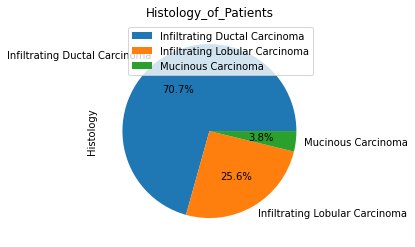

In [45]:
cancer_dataset['Histology'].value_counts().plot(kind='pie',title='Histology_of_Patients', legend=True, autopct='%2.1f%%');

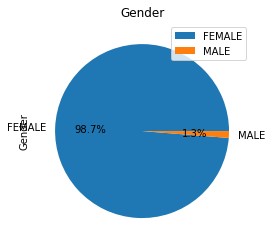

In [49]:
cancer_dataset.Gender.value_counts().plot(kind='pie',title='Gender',legend=True,autopct='%1.1f%%')
plt.show()

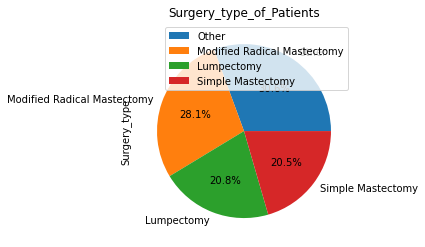

In [50]:
cancer_dataset['Surgery_type'].value_counts().plot(kind='pie',title='Surgery_type_of_Patients', legend=True, autopct='%2.1f%%');

In [52]:
cancer_dataset['Patient_Status'].describe()

count       317
unique        2
top       Alive
freq        255
Name: Patient_Status, dtype: object

In [53]:
cancer_dataset['Patient_Status'].value_counts()

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

In [59]:
table=pd.crosstab(cancer_dataset['Tumour_Stage'],cancer_dataset['Gender'])
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


In [60]:
table2=pd.crosstab(cancer_dataset['Surgery_type'],cancer_dataset['Gender'])
table2

Gender,FEMALE,MALE
Surgery_type,,
Lumpectomy,66,0
Modified Radical Mastectomy,87,2
Other,96,1
Simple Mastectomy,64,1


<AxesSubplot:xlabel='Tumour_Stage'>

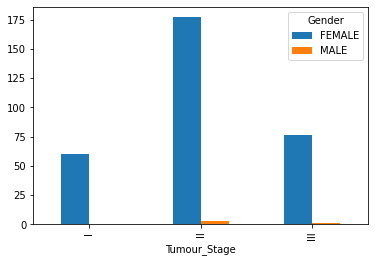

In [61]:
table.plot(kind='bar')

<AxesSubplot:xlabel='Surgery_type'>

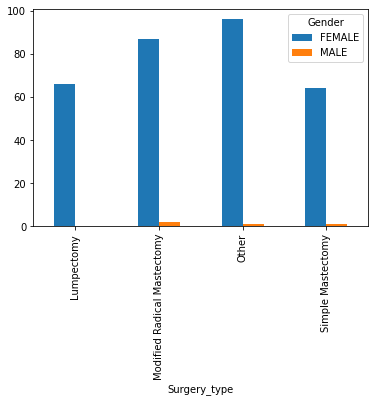

In [62]:
table2.plot(kind='bar')

In [63]:
table3=pd.crosstab(cancer_dataset['Surgery_type'],cancer_dataset['Tumour_Stage'])
table3

Tumour_Stage,I,II,III
Surgery_type,,,
Lumpectomy,22,36,8
Modified Radical Mastectomy,7,45,37
Other,18,56,23
Simple Mastectomy,13,43,9


<AxesSubplot:xlabel='Surgery_type'>

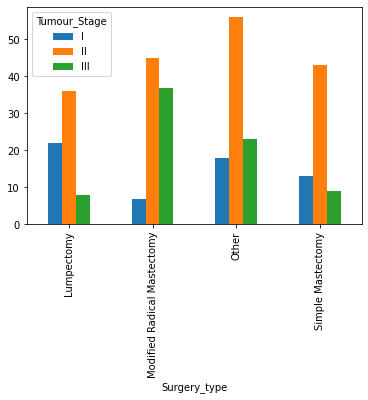

In [64]:
table3.plot(kind='bar')

In [65]:
cancer_dataset.Age.describe()

count    317.000000
mean      58.725552
std       12.827374
min       29.000000
25%       49.000000
50%       58.000000
75%       67.000000
max       90.000000
Name: Age, dtype: float64

In [70]:
cancer_dataset.Age.min()

29.0

In [71]:
cancer_dataset.Age.max()

90.0

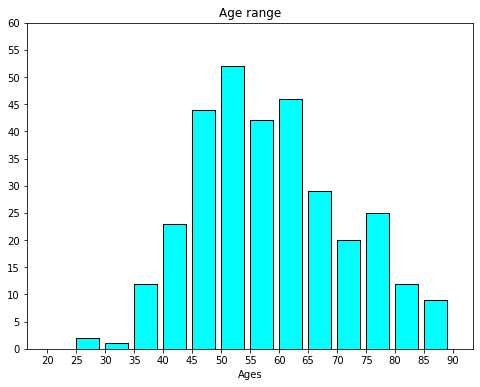

In [73]:
x = list(range(20,93,5))
plt.figure(figsize=(8,6))
plt.hist(cancer_dataset['Age'].astype(int),width=4, align='mid', bins = x, color='cyan', edgecolor = 'black')
plt.xticks(x)
plt.xlabel('Ages')
plt.title('Age range')
plt.yticks(np.arange(0,65,5))
plt.show()

#conculsion age between 45-65 are mostly affected by breast cancer

In [74]:
table4=pd.crosstab(cancer_dataset['Patient_Status'],cancer_dataset['Gender'])
table4

Gender,FEMALE,MALE
Patient_Status,,
Alive,252,3
Dead,61,1


In [75]:
table5=pd.crosstab(cancer_dataset['Patient_Status'],cancer_dataset['Tumour_Stage'])
table5

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,51,144,60
Dead,9,36,17


In [76]:
table6=pd.crosstab(cancer_dataset['Patient_Status'],cancer_dataset['Surgery_type'])
table6

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,17,24,12


In [84]:
table7=pd.crosstab(cancer_dataset['Patient_Status'],cancer_dataset['Histology'])
table7

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Patient_Status,,,
Alive,179,67,9
Dead,45,14,3


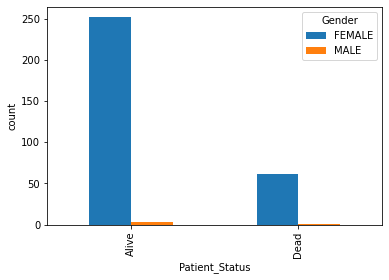

In [80]:
table4.plot(kind='bar',ylabel="count")
plt.show()

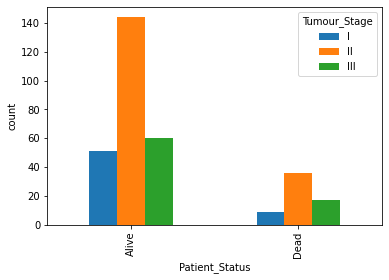

In [81]:
table5.plot(kind='bar',ylabel="count")
plt.show()

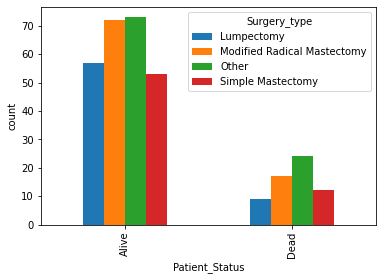

In [83]:
table6.plot(kind='bar',ylabel="count")
plt.show()

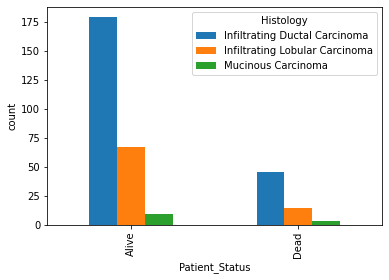

In [85]:
table7.plot(kind='bar',ylabel="count")
plt.show()

# replacing the categorical data with the numerical data

In [109]:
cancer_dataset['Tumour_Stage']=cancer_dataset['Tumour_Stage'].map({'I':1,'II':2,'III':3})
cancer_dataset['Histology']=cancer_dataset['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,})
cancer_dataset['ER status']=cancer_dataset['ER status'].map({'Positive':1})
cancer_dataset['PR status']=cancer_dataset['PR status'].map({'Positive':1})
cancer_dataset['HER2 status']=cancer_dataset['HER2 status'].map({'Positive':1,'Negative':2})
cancer_dataset['Gender']=cancer_dataset['Gender'].map({'MALE':1,'FEMALE':2})
cancer_dataset['Surgery_type']=cancer_dataset['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4})
cancer_dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,2,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,Alive
1,TCGA-EW-A1OX,43.0,2,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,Dead
2,TCGA-A8-A079,69.0,2,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,Alive
3,TCGA-D8-A1XR,56.0,2,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,Alive
4,TCGA-BH-A0BF,56.0,2,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,Dead


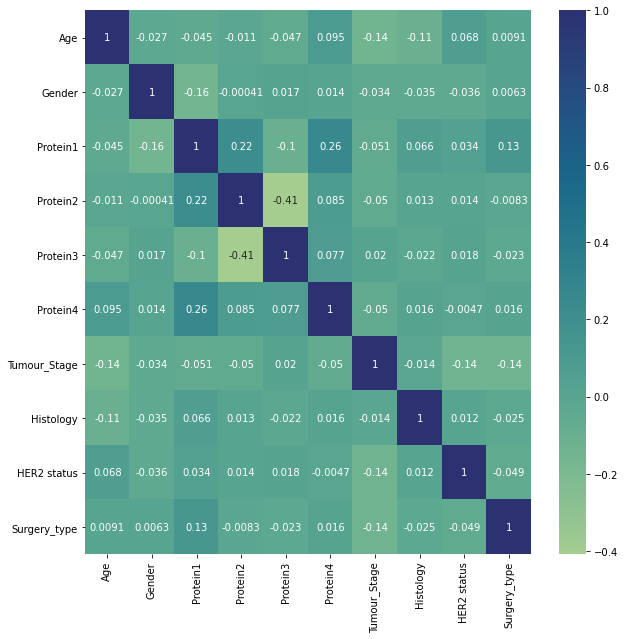

In [141]:
data=cancer_dataset.drop(columns = [ "ER status","PR status"], inplace = True)
corrmat=cancer_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(cancer_dataset[top_corr_features].corr(),annot=True,cmap="crest")

# building the model using the svm

In [110]:
x=cancer_dataset[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]

In [111]:
y=cancer_dataset["Patient_Status"] #class variable


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [114]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [115]:
y_predicted=model.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.828125

In [117]:
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']
